In [1]:
#loading of libaries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree

mpl.rcParams['figure.dpi']= 300
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#loading of the data into dataframes
#2020_DE_Region_Mobility_Report.csv aus github downloaden und den pfad in mobility_dl an den lokalen downloadordner anpassen 
mobility_dl = pd.read_csv("E:/Onedrive/Privat AnMath/2020_DE_Region_Mobility_Report.csv", delimiter = ',')                     
corona_dl = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv?v=2021-02-21", index_col = 'date')

In [3]:
#filtering of the dataframes
mobility = mobility_dl.groupby('date').mean().drop(['sub_region_2', 'metro_area', 'census_fips_code'], axis = 1)
mobility.columns = ['Retail and Recreation-M', 'Grocery and Pharmacy-M', 'Parks-M', 
                                 'Transit Stations-M', 'Workplaces-M', 'Residential-M']
corona= corona_dl[(corona_dl.location=='Germany')].drop(corona_dl.columns.difference(['reproduction_rate','new_deaths','new_cases','total_cases','total_deaths']),1)
corona.columns = ['Total Cases', 'New Cases', 'Total Deaths', 'New Deaths', 'R']

In [4]:
#merging of dataframes
df = pd.merge(corona, mobility, left_on = 'date', right_on ='date')

In [5]:
timetodeath = 28
df[['Total Deaths']] = df[['Total Deaths']][:-timetodeath]
df[['New Deaths']] = df[['New Deaths']][:-timetodeath]
df = df.fillna(value={'Total Deaths':0, 'New Deaths':0, 'R':0})
df.drop(df.tail(timetodeath).index,inplace=True)


In [6]:
df.tail()

,Total Cases,New Cases,Total Deaths,New Deaths,R,Retail and Recreation-M,Grocery and Pharmacy-M,Parks-M,Transit Stations-M,Workplaces-M,Residential-M
date,,,,,,,,,,,
2020-12-16,1423830.000,32744.000,24273.000,729.000,1.090,-51.118,-4.118,2.588,-40.353,-29.647,12.765
2020-12-17,1454009.000,30179.000,25027.000,754.000,1.080,-51.706,-1.529,-11.353,-42.412,-31.765,13.765
2020-12-18,1486839.000,32830.000,25754.000,727.000,1.060,-53.235,-3.059,2.882,-43.059,-32.471,14.471
2020-12-19,1508518.000,21679.000,26171.000,417.000,1.040,-61.882,-10.235,14.941,-40.294,-20.882,9.765
2020-12-20,1514962.000,6444.000,26400.000,229.000,1.020,-62.824,-24.529,-4.588,-46.176,-22.176,7.706


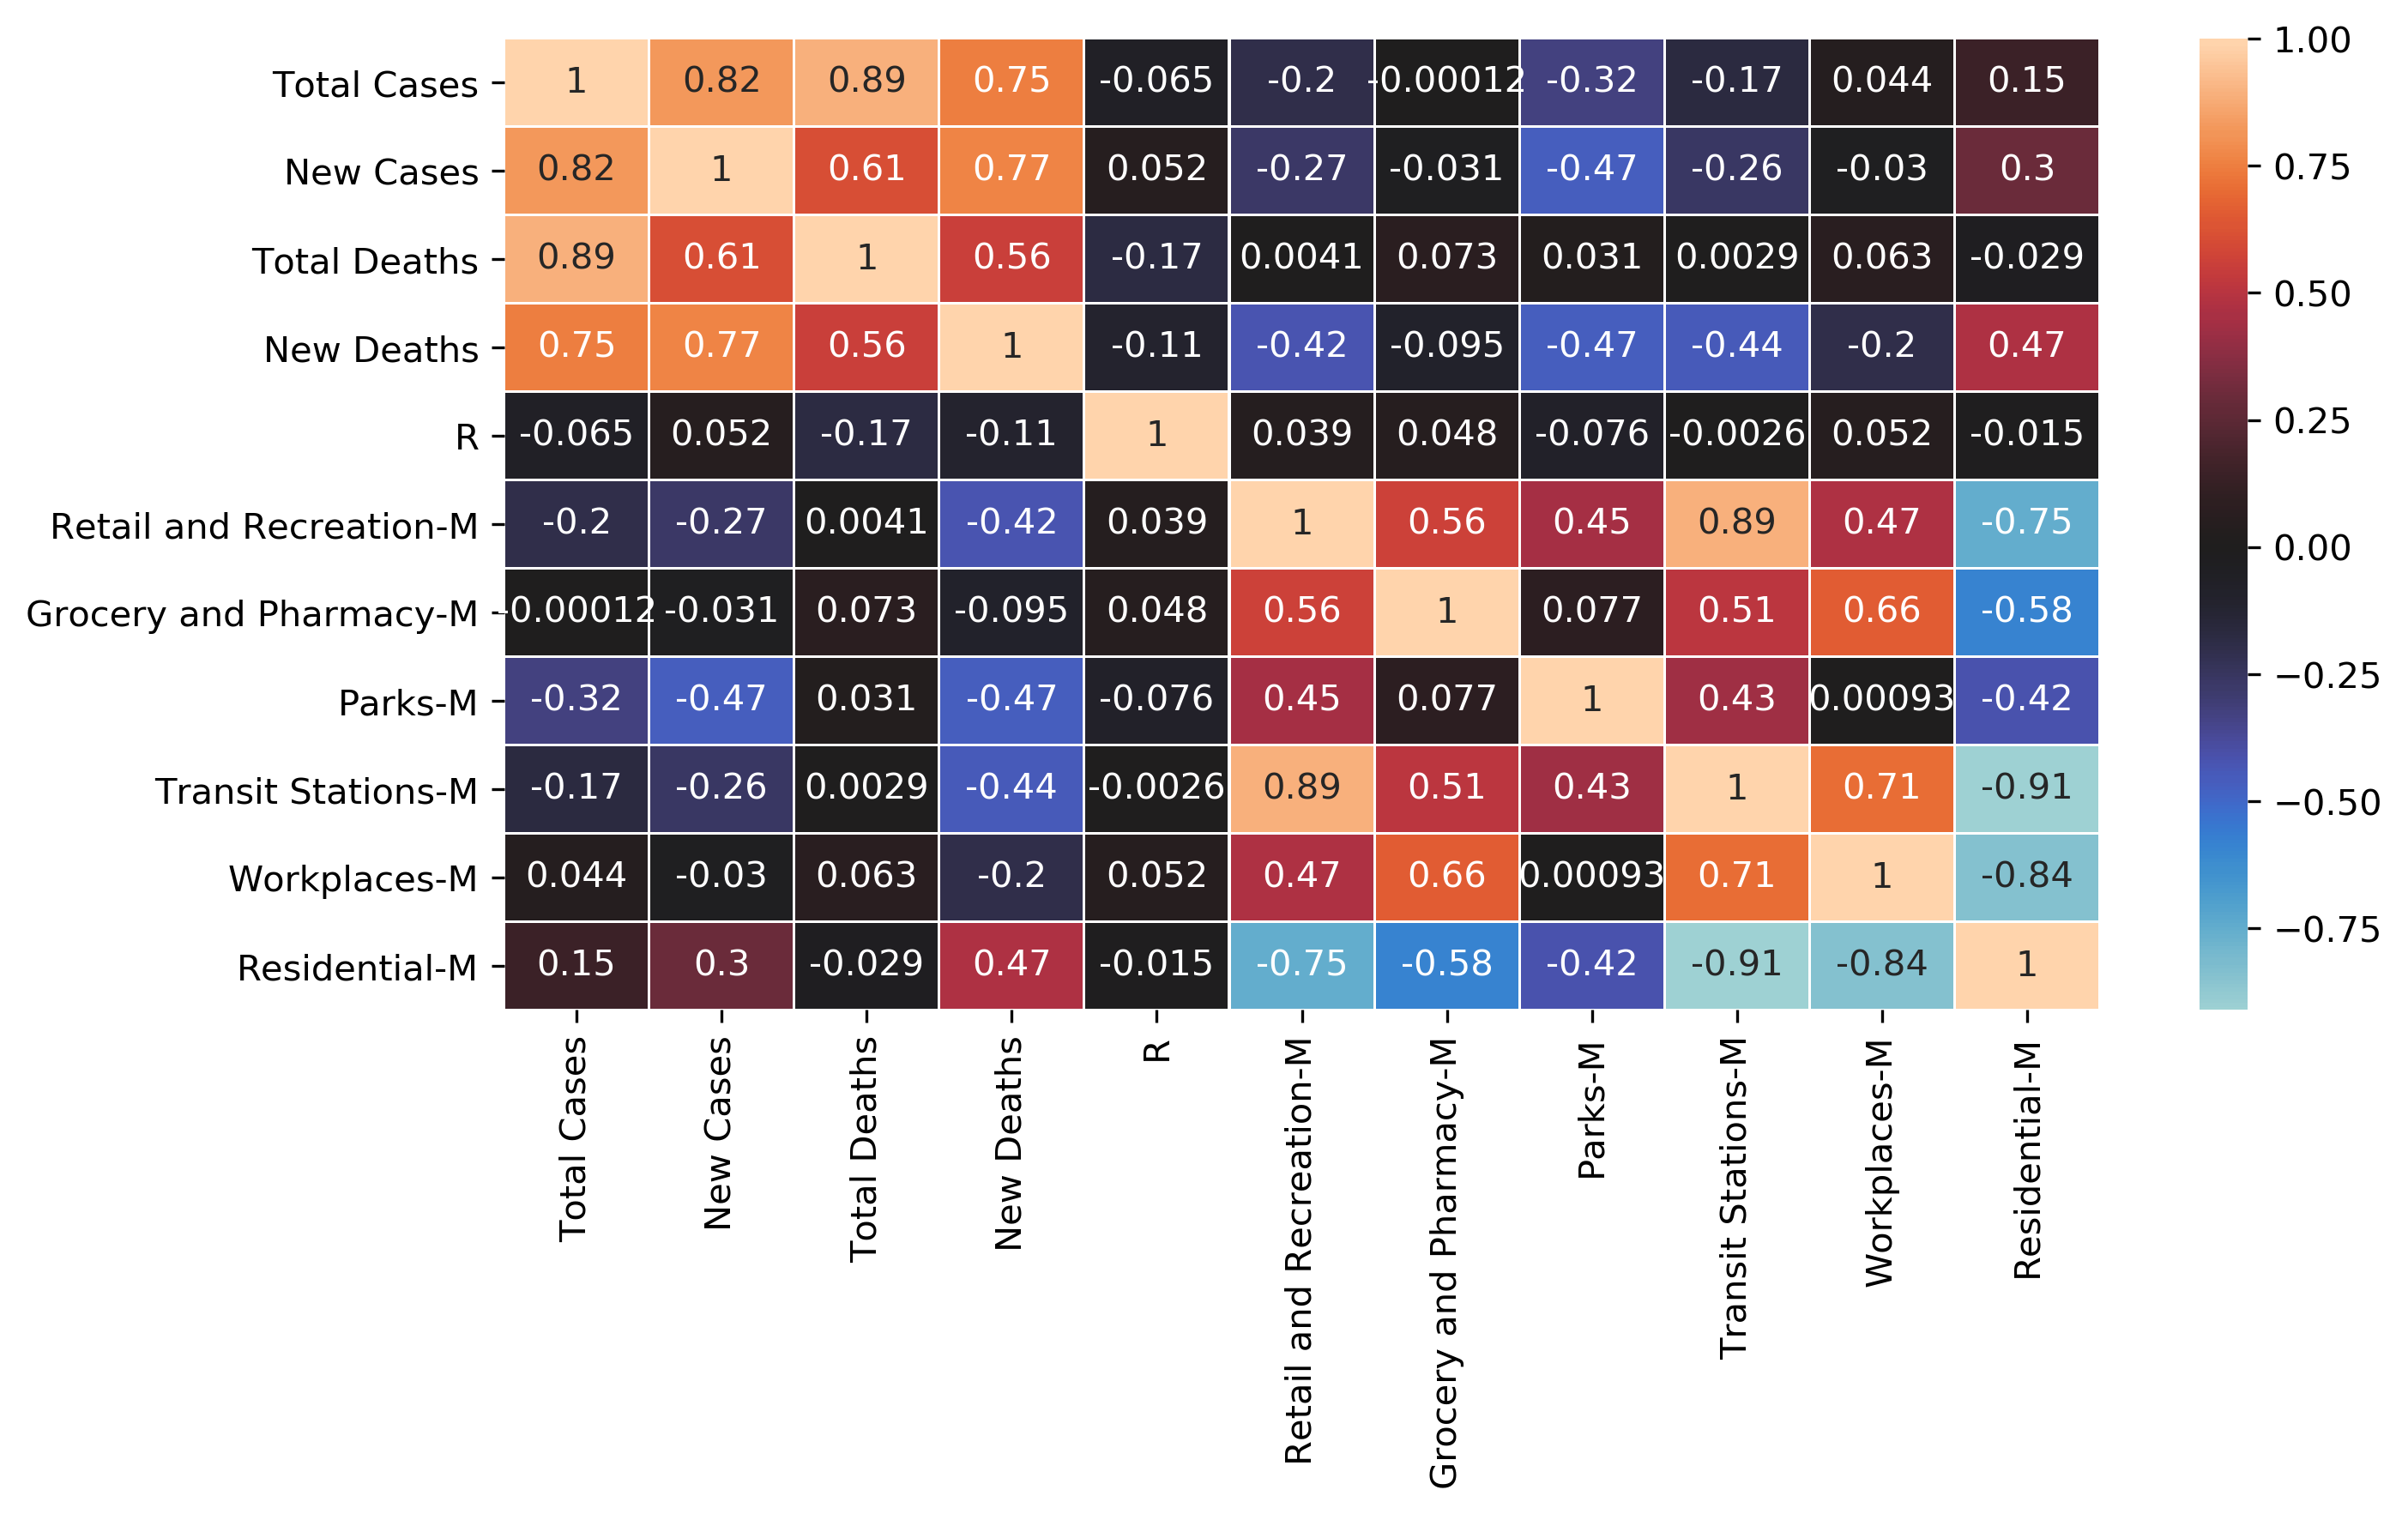

In [7]:
#corrolations of the dataframe
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, center = 0)

In [8]:
#selection of target and features
labels = np.array(df['New Cases'])
features= df.drop('New Cases', axis = 1)
feature_list = list(df.columns)
features = np.array(df)

In [9]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [10]:
#fitting of the df onto the regressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [11]:
#prediction
rf.predict([[2088000, 20398, 49783, 1013, 1, -67, -27, 17, -49, -20 , 6]])

array([20154.53])